## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

## Loading data

In [2]:
#Sample dataset
df = pd.read_csv('sample_submission.csv')

#Train dataset
train_id = pd.read_csv('train_identity.csv')
train_tr = pd.read_csv('train_transaction.csv')

#Test dataset
test_id = pd.read_csv('test_identity.csv')
test_tr = pd.read_csv('test_transaction.csv')

## Observing the dataframes

In [3]:
df.head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


In [4]:
train_tr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
test_tr.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


This data seems quite huge and hard to understand. __TransactionID__ is the common column in both transaction data and identity data, and the two tables can be joined using this common column.

In [8]:
train = pd.merge(train_tr, train_id, on = 'TransactionID', how = 'left')
test = pd.merge(test_tr, test_id, on = 'TransactionID', how = 'left')

In [9]:
print(f'Train dataset: {train.shape[0]} rows & {train.shape[1]} columns')
print(f'Test dataset: {test.shape[0]} rows & {test.shape[1]} columns')

Train dataset: 590540 rows & 434 columns
Test dataset: 506691 rows & 433 columns


In [10]:
del train_id, train_tr, test_id, test_tr

In [11]:
# reduce your memory by conversion
# convert it to the low memory to fit the RAM
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [12]:
#now we should reduce the memory to free the RAM or else we cant fit the model
train=reduce_mem_usage(train)
test=reduce_mem_usage(test)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


## What is the target?

In [13]:
[c for c in train.columns if c not in test.columns]

['isFraud']

,0,1
isFraud,0.96501,0.03499


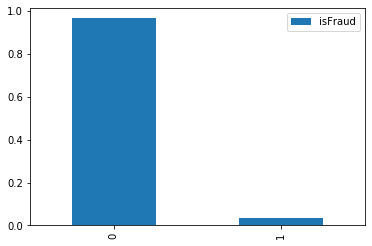

In [14]:
fraud_df = train['isFraud'].value_counts(normalize = True).to_frame()
fraud_df.plot.bar()
fraud_df.T

## Recognize categorical and numerical attributes

In [15]:
def create_col_names(base_str, start_int, end_int):
    return [base_str + str(i) for i in range(start_int, end_int + 1)]

In [16]:
cat_cols = (['ProductCD'] + create_col_names('card', 1, 6) + ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain'] +
            create_col_names('M', 1, 9) + ['DeviceType', 'DeviceInfo'] + create_col_names('id_', 12, 38))

id_cols = ['TransactionID', 'TransactionDT']

target = 'isFraud'

In [17]:
numerical_cols = [col for col in train.columns.tolist() if col not in cat_cols + id_cols + [target]]

_The rest of features are numerical attributes_

In [18]:
data_null = train.isnull().sum() / len(train) * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio': data_null})
missing_data.shape

(414, 1)

_There are 414 attributes containing null values_

_Now I will delete attribues with more than 90 percent missing values_

## NA Values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

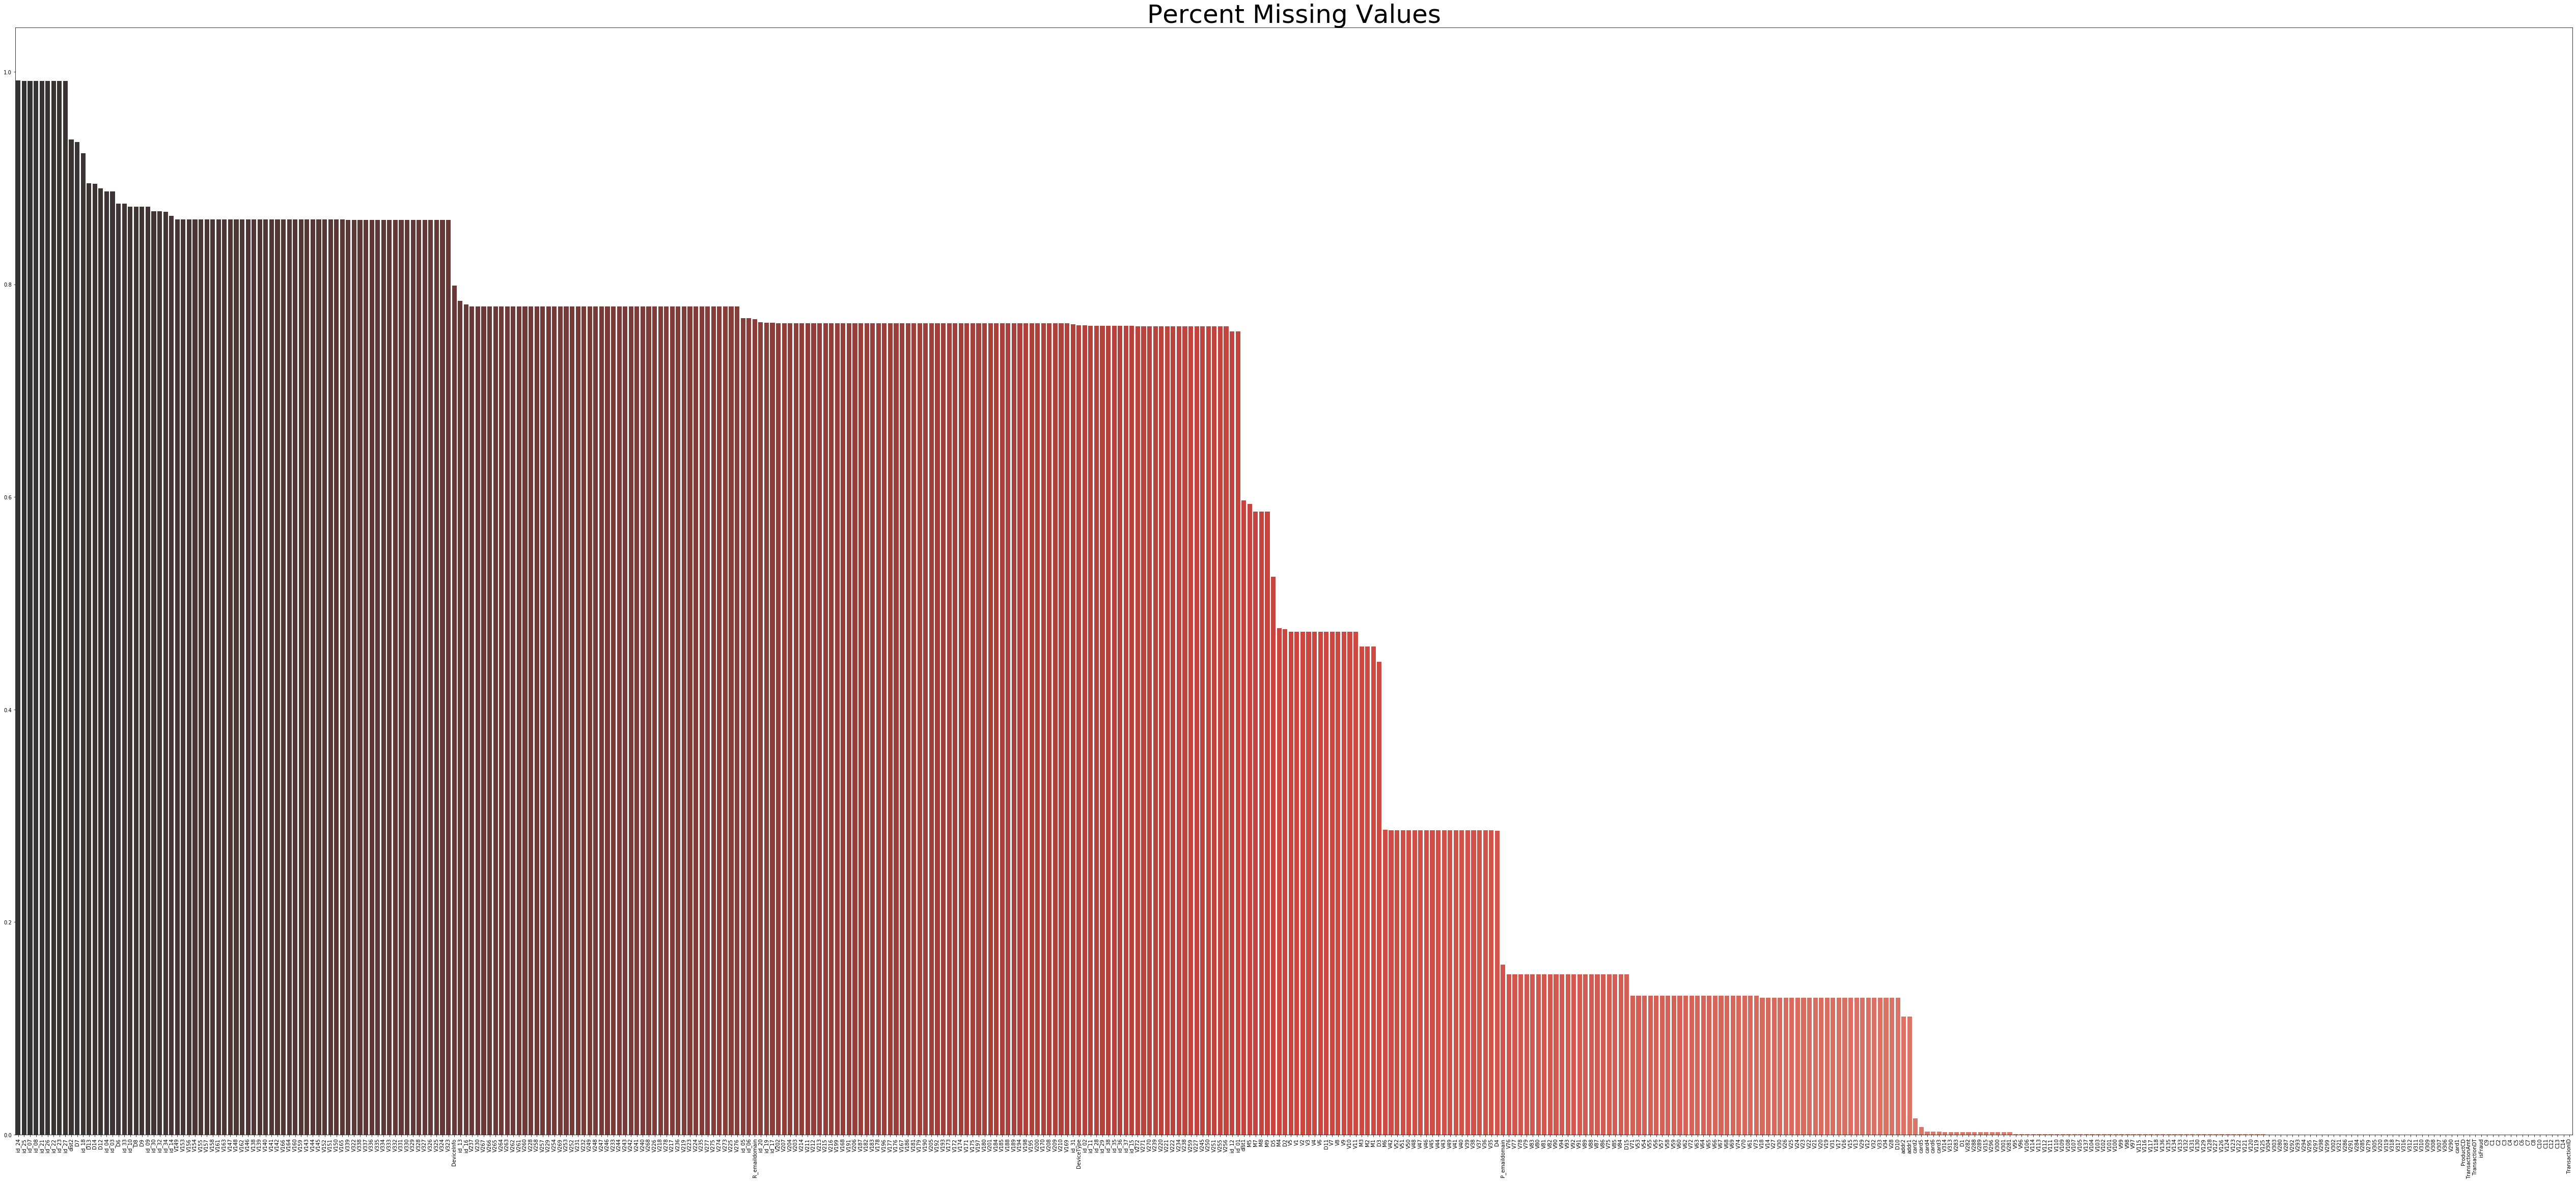

In [19]:
plt.figure(figsize = (90, 40))

sns.barplot(y = train.isnull().sum().sort_values(ascending = False)/len(train),
        x = train.isnull().sum().sort_values(ascending = False).index,
        palette = 'Reds_d')

plt.title('Percent Missing Values', size = 50)
plt.xticks(rotation = 90)

## Handling NAs

_*Strategies for dealing with NAs*_

1.- Drop data

2.- Impute/recode NAs

In [20]:
columns_df = pd.DataFrame({'na_count': train.isnull().sum().sort_values(ascending = False)})

In [21]:
#Create column of percent columns, #higher is worst
columns_df['percen'] = columns_df['na_count']/len(train)

In [22]:
columns_df

,na_count,percen
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
...,...,...
C11,0,0.000000
C12,0,0.000000
C13,0,0.000000
C14,0,0.000000


In [23]:
#Cycle through various limit for percent Na per column
range = [0.05, 0.10, 0.15, 0.25, 0.40, 0.60, 0.75]

In [24]:
for i in range:
    print(columns_df[columns_df['percen']<i].shape[0]/train.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [25]:
limit = 0.15 #only columns w/ less 10% will remain

In [26]:
#Select final columns
columns_final = columns_df[columns_df['percen'] < limit].index

train = train[train.columns.intersection(columns_final)]

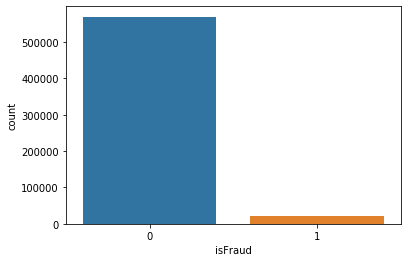

In [27]:
sns.countplot(train.isFraud)

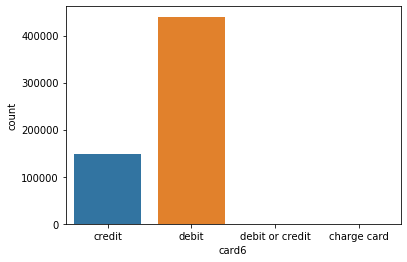

In [28]:
sns.countplot(train.card6)

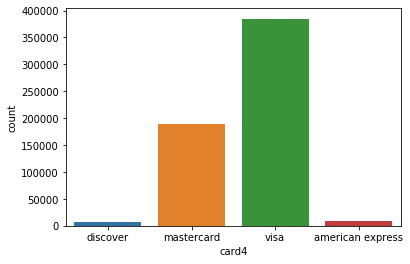

In [29]:
sns.countplot(train.card4)

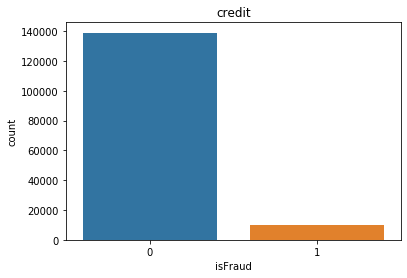

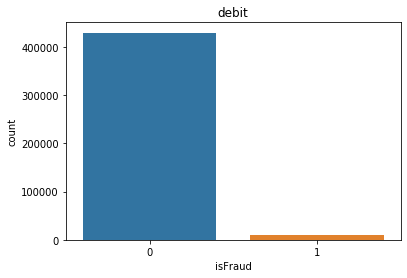

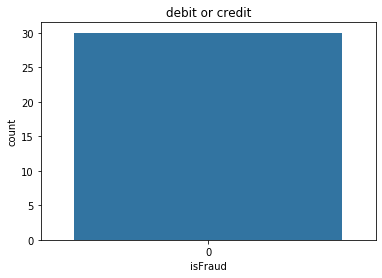

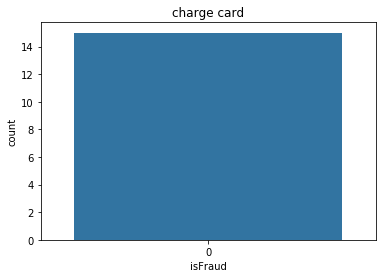

In [31]:
cardTypes = ['credit', 'debit', 'debit or credit', 'charge card']

for i, i_card in enumerate(cardTypes):
    cardData = eval('train[train["card6"] =="'+ i_card +'"]')
    plt.figure(i)
    sns.countplot(cardData['isFraud']).set_title(i_card)

In [32]:
train[train.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
...,...,...,...
590535,W,visa,debit
590536,W,mastercard,debit
590537,W,mastercard,debit
590538,W,mastercard,debit


In [33]:
train.shape

(590540, 160)

In [34]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.500000,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0000,0.0000,0.0000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.000000,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.000000,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.000000,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0000,0.0000,0.0000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.000000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.000000,W,6550,NaN,150.0,visa,226.0,...,0.0,47.9375,47.9375,47.9375,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.500000,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.953125,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.000000,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.5000,669.5000,317.5000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


## Dealing with categorical

In [35]:
card6_dummy = pd.get_dummies(train['card6'])

In [36]:
train = pd.concat([train, card6_dummy], axis = 1)

In [37]:
train.shape

(590540, 164)

In [38]:
train = train._get_numeric_data()

train = train.dropna()

len(train[train['isFraud'] == 1]) / len(train) * 100

2.04579077462003

In [39]:
X = train.drop(['isFraud'], axis = 1)
y = train['isFraud']

## Modeling

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [41]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr.score(X_test, y_test)

0.9796999117387467

In [43]:
y_pred = lr.predict(X_test)

In [44]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,214221,28,214249
1,4411,9,4420
All,218632,37,218669


In [45]:
recall_score(y_test, y_pred)

0.0020361990950226246

In [46]:
accuracy_score(y_test, y_pred)

0.9796999117387467